## <center>Go Pokemon! What does the data talk about?
Student: Chia Lin Chiu #47717533 , Arham Newaz #36588168

Professor: Peifan Wu

Econ323-002
    
Dec, 20th, 2021
    
Github repository: 

### Introduction of the data

Pokemon is one of the most successful media franchises ever. It generates billions of dollars every year and brings joy to numerous fans. We are one of these fans and wanted to obtain a deeper understanding of the video game. Pokemon has a thriving competitive video game scene, and hopefully this analysis will suffice as a quick introduction into the intricacies of this complex game. Our main data set was derived from kaggle(Resource:https://www.kaggle.com/rounakbanik/pokemon).

The data set contains several game related data, however this analysis mainly focuses on the stats most important for battling: 

- Attack  - The attack power parameter if pokemon physically attacks another pokemon 

- Defence - The defensive power parameter of a pokemon during a physical attack by another pokemon

- Special Attack - The attack power magnifier of attack abilities for pokemon 

- Special Defence -  The defence power magnifier of defensive abilities for pokemon 

- HP - The health points for a pokemon 

- Base Total - The sum of attack, defence, special attack, special defence and HP 

- Type - The elemental type of the pokemon 

- Generation - The generation of Pokemon ( contains 7 generations)

- Legendary -  Pokemon status according to Pokemon game lore(often rare Pokemon is deemed as legendary) 

- Weight - The weight of the pokemon in kilograms(kg)

- Height -  The height of Pokemon in meters(m) 

- Abilities/ Against- The type of abilities and their outcome against another ability. 

Note: We understand that a new generation(generation 8) of pokemon is recently out and is not included in this dataset, however later down this analysis. We webscrape a popular pokemon website(https://pokemondb.net/pokedex/stats/gen8) and compare it to the previous generations. We did not merge generation 8 pokemon into the original data set because the game developers are still creating and adjusting the stats. 




-----------

### Outline 

Our analysis reviews several perspectives of the battle stats of pokemon, each section will be increasing in complexity. 

- Section 1: Visualization of Stat trends from each generation (How does each generation differ). 

- Section 2: Visualization of Stat trends of Pokemon type (Are pokemon with two types stronger than pokemon with one type).

- Section 3: Correlational models of distribution of pokemon stats (Attempts to predict the distribution of stats).

- Section 4: Machine learning models, designed to guess if a Pokemon is legendary based off its stats (Attempts to explain the differences of a legendary and non-legendary pokemon).


-----

### Section 0: Import statements and read the file

In [2]:
# import statements
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import math
import scipy.stats as sc
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
#from soccerplots.radar_chart import Radar


%matplotlib inline

In [3]:
Pokemon = pd.read_csv("./pokemon.csv") 
# This csv file is origin dataset from Kaggle.

Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])

Note: Why we added new column total, and not base_attack:
We understand that total = base_total, and we added this because the present data set is not well organized. Thus,it is harder to manipulate. We added “total” purely for the ease of manipulation during coding. 
It will be later dropped for simplification as well.  

-----------

### Section 1: What are the Pokemon stat differences/ trends from each generation? 

-   Hypothesis floated in our mind: We think there is a stat inflation by each newer generation, which means the newer pokemon genertaion is better than the old pokemon generation.

    Lets see what is going on ...

In [4]:
# firstly, using generation column to set the DataFrame index.
# Because our purpose is to compare the different generations.

Pokemon_generation = Pokemon.set_index(["generation"])
Pokemon_generation
generation=pd.DataFrame(Pokemon_generation[Pokemon_generation.columns[33:39]])
generation

,sp_attack,sp_defense,speed,type1,type2,weight_kg
generation,,,,,,
1,65,65,45,grass,poison,6.9
1,80,80,60,grass,poison,13.0
1,122,120,80,grass,poison,100.0
1,60,50,65,fire,NaN,8.5
1,80,65,80,fire,NaN,19.0
...,...,...,...,...,...,...
7,107,101,61,steel,flying,999.9
7,59,31,109,grass,steel,0.1
7,97,53,43,dark,dragon,888.0


Text(0.5, 1.0, 'P1: bar chart of four functions distribution in 1-7 generations.')

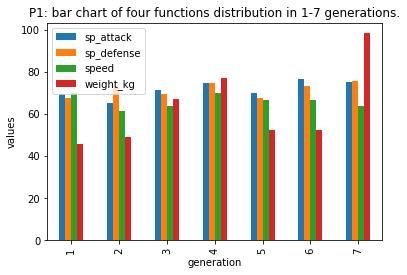

In [5]:
# grouping dataframe by different variables (sp_attack, sp_defense, speed, and weight_kg).

p1=generation.groupby(pd.Grouper(level="generation")).mean()
p1.plot.bar()
plt.ylabel('values') 
plt.title("P1: bar chart of four functions distribution in 1-7 generations.")

<AxesSubplot:title={'center':'P2: Distribution for primary type of the Pokemon(by generation).'}, xlabel='generation', ylabel='count'>

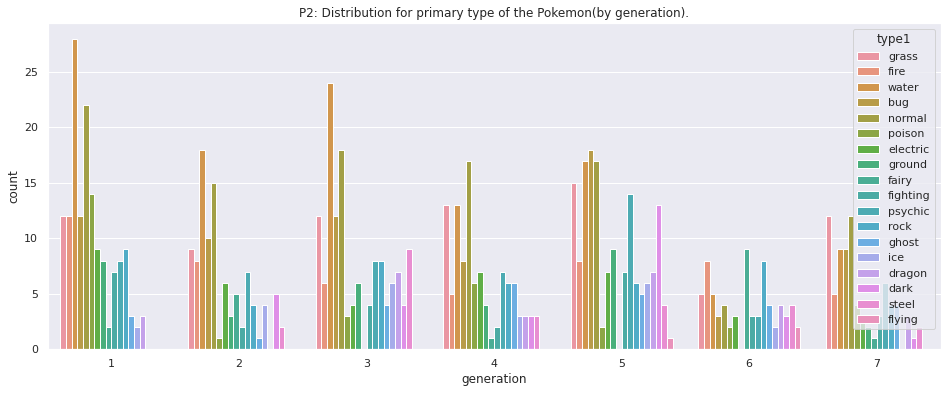

In [6]:
# type1: the primary type of the Pokemon. eg: Pikachu uses electric. 
# Instead of viewing dataset line by line, we can easier understand the count of primary type in each generation at one glance.

sns.set(font_scale=1)
plt.figure(figsize=(16,6))
plt.title("P2: Distribution for primary type of the Pokemon(by generation).")
sns.countplot(x="generation",hue="type1", data=Pokemon)

In [7]:
# type count
# type1: The primary type
# type2: The Secondary Type of the Pokemon

type_gen=generation.groupby("generation")["type1","type2"].count()
type_gen

/tmp/ipykernel_182/2911180236.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_gen=generation.groupby("generation")["type1","type2"].count()


,type1,type2
generation,,
1,151,81
2,100,49
3,135,66
4,107,54
5,156,75
6,72,41
7,80,51


Text(0.5, 1.0, 'P3: type count')

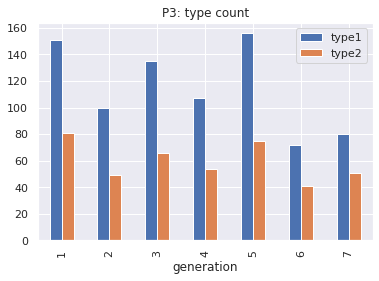

In [8]:
type_gen.plot.bar(subplots=False)
plt.title("P3: type count")

Text(0.5, 1.0, 'P4: box-and-whisker plot. Hp with generation')

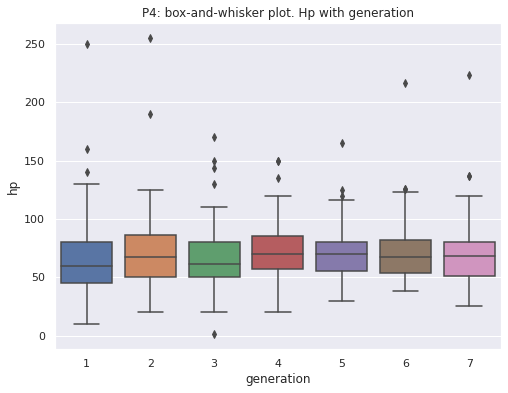

In [8]:
# The base Hit Points(HP) with generation.
# Obviously, the higher the hp, the stronger the role.

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="hp", data=Pokemon)
plt.title('P4: box-and-whisker plot. Hp with generation')

Text(0.5, 1.0, 'P5: violin plot(speed)')

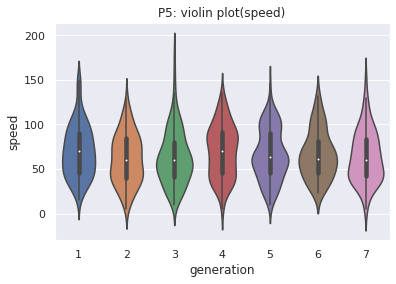

In [9]:
P5 = sns.violinplot(x="generation", y="speed", data=Pokemon)
P5
plt.title('P5: violin plot(speed)')

#### Section 1 Conclusion:

Our hypothesis is wrong, even though there are some slight changes like the addition of several different types of pokemon in each generation. The overall battle stat changes did not significantly change over each generation concluded from the eye-ball test of our graphs.

In P1, the four most outstanding performances have no inflation.

In P3, Pokémon with two types does not increase with generation.

In P4, there is no gradual growth trend.

In P5, speed does not have inflation.

---------------

#### Correlations(additional part):

Besides, we also curious about the correlation between generations: 

In [11]:
#set each generation
gen1 = Pokemon[Pokemon['generation'] == 1]
gen2 = Pokemon[Pokemon['generation'] == 2]
gen3 = Pokemon[Pokemon['generation'] == 3]
gen4 = Pokemon[Pokemon['generation'] == 4]
gen5 = Pokemon[Pokemon['generation'] == 5]
gen6 = Pokemon[Pokemon['generation'] == 6]
gen7 = Pokemon[Pokemon['generation'] == 7]

In [12]:
print('Correlation between hp and speed in generation 1 =',gen1['hp'].corr(gen1['speed']))
print('Correlation between hp and speed in generation 2 =',gen2['hp'].corr(gen2['speed']))
print('Correlation between hp and speed in generation 3 =',gen3['hp'].corr(gen3['speed']))
print('Correlation between hp and speed in generation 4 =',gen4['hp'].corr(gen4['speed']))
print('Correlation between hp and speed in generation 5 =',gen5['hp'].corr(gen5['speed']))
print('Correlation between hp and speed in generation 6 =',gen6['hp'].corr(gen6['speed']))
print('Correlation between hp and speed in generation 7 =',gen7['hp'].corr(gen7['speed']))

Correlation between hp and speed in generation 1 = -0.02315482771461441
Correlation between hp and speed in generation 2 = 0.15490296843431908
Correlation between hp and speed in generation 3 = 0.25394253674073497
Correlation between hp and speed in generation 4 = 0.2239174624871413
Correlation between hp and speed in generation 5 = 0.22416564097386785
Correlation between hp and speed in generation 6 = 0.29043893041413577
Correlation between hp and speed in generation 7 = 0.1494638897212455


- Correlation heatmap for abilities and their outcome against another abilities. As we know, the same abilities has the highest correlation which is 1 with each other. When the color is darker, the correlation is lower.

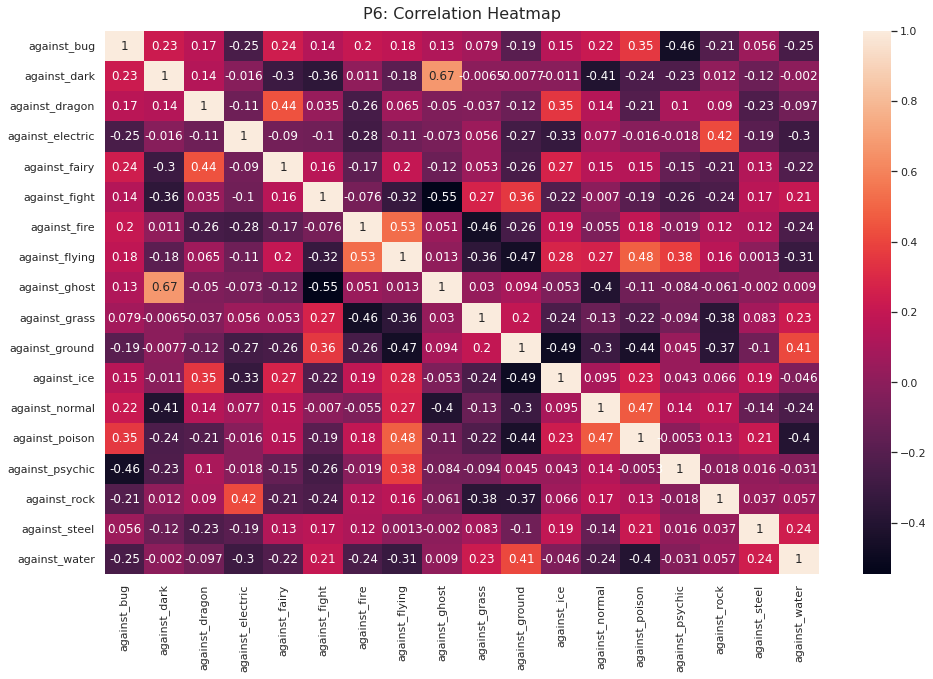

In [13]:
plt.figure(figsize=(16, 10))
against=Pokemon.iloc[:,1:19]
sns.heatmap(against.corr(),annot=True)

plt.title('P6: Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

----------------------

### Section 2: What are the key differences between pokemon types and stats? 

   We assumed that Pokemon which has more than one type(own two types) has higher total stats(hp, speed, attack..etc)
   We will attempt to establish a theme of pokemon type and their distribution of stats.
   

In [14]:
ok=Pokemon.fillna(0)
#data = gen1.set_index(["type1"])
#Pokemon_type1=pd.DataFrame(data)

#----------Gen 1 
gen1 = ok[ok['generation'] == 1]
onlytype1=gen1[gen1['type2'] == 0]
onlytype2=gen1[gen1['type2'] != 0]
#print(onlytype1.total.describe())
#print(onlytype2.total.describe())

onlytype1.total.mean()
onlytype2.total.mean()

#------- Gen 2 
gen2 = ok[ok['generation'] == 2]
onlytype1for2=gen2[gen2['type2'] == 0]
onlytype2for2=gen2[gen2['type2'] != 0]
#print(onlytype1for2.total.describe())
#print(onlytype2for2.total.describe())
#onlytype2.total.mean()

#------ Gen 3 
gen3 = ok[ok['generation'] == 3]
onlytype1for3=gen3[gen3['type2'] == 0]
onlytype2for3=gen3[gen3['type2'] != 0]
#print(onlytype1for3.total.describe())
#print(onlytype2for3.total.describe())


#----- Gen 4 
gen4 = ok[ok['generation'] == 4]
onlytype1for4=gen4[gen4['type2'] == 0]
onlytype2for4=gen4[gen4['type2'] != 0]
#print(onlytype1for4.total.describe())
#print(onlytype2for4.total.describe())


#---- Gen 5 
gen5 = ok[ok['generation'] == 5]
onlytype1for5=gen5[gen5['type2'] == 0]
onlytype2for5=gen5[gen5['type2'] != 0]
#print(onlytype1for5.total.describe())
#print(onlytype2for5.total.describe())


#----- Gen 6 
gen6 = ok[ok['generation'] == 6]
onlytype1for6=gen6[gen6['type2'] == 0]
onlytype2for6=gen6[gen6['type2'] != 0]
#print(onlytype1for6.total.describe())
#print(onlytype2for6.total.describe())


#----- Gen 7 
gen7 = ok[ok['generation'] == 7]
onlytype1for7=gen7[gen7['type2'] == 0]
onlytype2for7=gen7[gen7['type2'] != 0]
#print(onlytype1for7.total.describe())
#print(onlytype2for7.total.describe())


In [15]:
data = {'Type 1 mean':[onlytype1.total.mean(), onlytype1for2.total.mean(),onlytype1for3.total.mean(),
                 onlytype1for4.total.mean(),onlytype1for5.total.mean(),onlytype1for6.total.mean(),onlytype1for7.total.mean()],
        'Type 2 mean':[onlytype2.total.mean(), onlytype2for2.total.mean(),onlytype2for3.total.mean(),
                 onlytype2for4.total.mean(),onlytype2for5.total.mean(),onlytype2for6.total.mean(),onlytype2for7.total.mean()],
       }
  
# Creates pandas DataFrame.
percentile_list = pd.DataFrame(data, index =['gen 1','gen 2','gen 3','gen 4','gen 5','gen 6','gen 7'])
percentile_list

,Type 1 mean,Type 2 mean
gen 1,407.600000,423.728395
gen 2,400.470588,426.408163
gen 3,404.405797,436.348485
gen 4,433.301887,468.722222
gen 5,407.000000,448.680000
gen 6,405.161290,462.146341
gen 7,408.275862,470.843137


Text(0.5, 1.0, 'P7: Mean value of the total column in each generation')

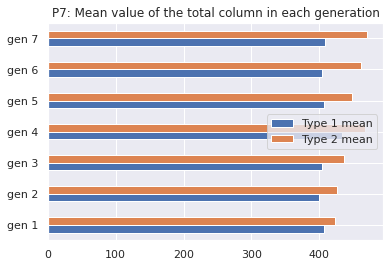

In [16]:
ax = percentile_list.plot.barh()
ax.set_title("P7: Mean value of the total column in each generation")

In [17]:
edata=Pokemon.fillna(0)
allgentype1= edata[edata['type2'] == 0]
allgentype2= edata[edata['type2'] != 0]

print(allgentype2.base_total.describe())
print(allgentype1.base_total.describe())
print(edata.base_total.describe())

count    417.000000
mean     445.894484
std      119.354125
min      190.000000
25%      340.000000
50%      464.000000
75%      520.000000
max      780.000000
Name: base_total, dtype: float64
count    384.000000
mean     409.354167
std      116.235399
min      180.000000
25%      310.000000
50%      405.000000
75%      495.000000
max      780.000000
Name: base_total, dtype: float64
count    801.000000
mean     428.377029
std      119.203577
min      180.000000
25%      320.000000
50%      435.000000
75%      505.000000
max      780.000000
Name: base_total, dtype: float64


In [19]:
print(sc.stats.ttest_ind(onlytype1.total,onlytype2.total))
sc.stats.ttest_ind(allgentype1.total,allgentype2.total)

Ttest_indResult(statistic=-0.8796089051707912, pvalue=0.38048763695778676)


Ttest_indResult(statistic=-4.383170789740527, pvalue=1.3258212170067869e-05)

- Radar Chart

This chart was inspired from the ingame feature of distribution of battle stats. We wanted to show an overlap of two different pokemon to highlight their differences in battle characteristics.This is especially useful when designing a team of pokemon for battle. In this case, we choose Pikachu and Hypno. The main reason is that they have different types, and the second reason is that those pokemons are our fav.

In [20]:
pip install soccerplots

  Using cached soccerplots-1.0.0-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
temp=['name','sp_attack','sp_defense','attack','defense','hp','speed',]

for i in range(len(temp)):
    df=Pokemon[temp]

df=df[(df['name']=='Pikachu')|(df['name']=='Hypno')].reset_index()
df=df.drop(['index'],axis=1)
params=list(df.columns)
params=params[1:]
ranges=[]
a_value=[]
b_value=[] #create an empty list

for x in params:
    a=min(df[params][x])
    a=a-(a*0.25)
    
    b=max(df[params][x])
    b=b+(b*0.25)
    
    ranges.append((a,b))
    
for x in range(len(df['name'])):
    if df['name'][x]=='Pikachu':        
        a_values=df.iloc[x].values.tolist()
    if df['name'][x]=='Hypno':      
        b_values=df.iloc[x].values.tolist()
        
a_values=a_values[1:]
b_values=b_values[1:]

values=[a_values,b_values]

In [22]:
title=dict(
    title_name='Pikachu',
    title_color='gold',
    subtitle_name='Type: Electric',
    subtitle_clor='red',
    title_name_2='Hypno',
    title_color_2='teal',
    subtitle_name_2='Type: Psychic',
    subtitle_clor_2='blue',
    title_fontsize=18,
    subtitle_fontsize=15   
)
endnote='endnote'

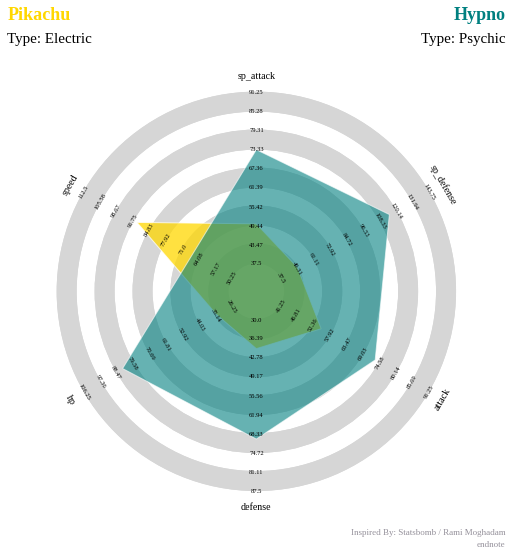

In [24]:
from soccerplots.radar_chart import Radar
radar=Radar()
fig, ax=radar.plot_radar(ranges=ranges, params=params,values=values, 
                        radar_color=['gold','teal'],
                         alphas=[0.75,0.6], title=title, endnote=endnote,
                         compare=True)

#### Section 2 Conclusion:
Even though two type pokemon have a slight edge than one type pokemon shown from graphs of the base totals. It does not hold any overall statistical significance. Yes there are differences in each generation, but it is advised that when designing a competitive team two-type pokemon is not always superior to one-type pokemon. 

------------------------------

### Section 3: Regression models with different stats to do projection of some functions.

Now we already figured out how the types affect Pokemon performance in each generation. We try to understand the relationship of each stat of a pokemon to get an overall picture of how the developers might distribute points.  We attempt to test these predictions by testing eight generation pokemon stat predictions. 

-  1. Simple Linear model regression (eg. we choose special attack / special defense)
-  2. Multiple linear regression (eg. we aim to predict the speed value in eighth generation)
-  3. Lasso Regression and Ridge Regression (attempting to better increase accuracy)
-  4. Random Forest Regression (attempting to even further accuracy) 
  

Then... start
- 1) Simple Linear Regression

In [25]:
X = Pokemon.iloc[:, 33].values.reshape(-1,1) # we choose 'sp_attack'for our x
y = Pokemon.iloc[:,34].values # we chosse 'sp_defense' for our y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

w_0 = regressor.intercept_
w_1 = regressor.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)

# result sp_defense = 0.45* sp_attack + 38.65 

Interception :  38.65466117361639
Coeficient :  [0.45199567]


In [26]:
#the accuracy
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.24156740355004558
Accuracy: 24.15674035500456%


In [27]:
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [ 99.67407602 104.19403268  58.99446612  95.15411937  45.43459616
  45.43459616  74.81431442  79.33427107 110.97396766  74.81431442
  97.4140977   56.7344878   56.7344878   68.03437943  74.81431442
  49.95455281  66.22639677  83.85422773  71.19834909  77.97828408
  83.85422773  65.77440111  73.91032309  72.55433609  99.67407602
  65.77440111  72.55433609  74.81431442  63.51442278  86.11420606
  61.25444445  54.47450947  92.89414104  70.29435776  49.95455281
  54.92650513  56.7344878   81.5942494   83.85422773  89.27817572
  65.32240544  88.37418438  77.97828408  52.21453114  74.81431442
  90.63416271  68.03437943  56.7344878   65.77440111  80.2382624
  86.11420606  81.5942494   77.07429275  63.51442278  54.47450947
  56.7344878   83.85422773  79.33427107  63.06242711  68.03437943
  95.15411937  65.77440111  92.89414104  56.7344878   79.33427107
  49.95455281  61.25444445  77.07429275  63.51442278  54.47450947
  63.51442278  63.96641844  81.5942494   58.99446612  74.81431442


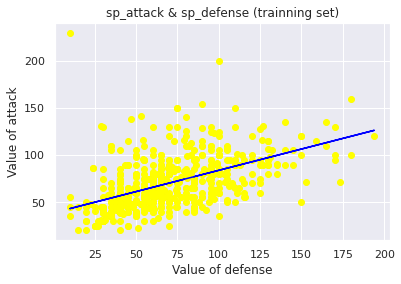

In [28]:
# blue line is a straight line that minimizes the discrepancies.
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sp_attack & sp_defense (trainning set)')
plt.xlabel("Value of defense") 
plt.ylabel("Value of attack")
plt.show()

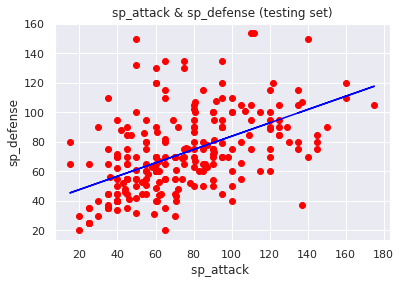

In [29]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('sp_attack & sp_defense (testing set)')
plt.xlabel("sp_attack ")
plt.ylabel("sp_defense")
plt.show()

- 2) Multiple Linear regression


   Using 'sp_attack', 'sp_defense','hp','attack','defense' variables to do multiple linear regression, tring to predict the 'speed' value of the 8th generation.

In [30]:
features = ['sp_attack','sp_defense','hp','attack','defense']
target = 'speed'

X = Pokemon[features].values.reshape(-1, len(features))
y = Pokemon[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
model.coef_
model.intercept_
model.score(X, y)

x_pred = np.array([40, 30, 28, 60, 30]) #Assume these values: Dreepy, its acutal speed: 82
x_pred = x_pred.reshape(-1, len(features))
print("The 'speed' value of 40, 30, 28, 60, 30 is predicted to be: ")
model.predict(x_pred)

The 'speed' value of 40, 30, 28, 60, 30 is predicted to be: 


array([61.16098212])

- 3) Lasso Regression & Ridge Regression 

In [31]:
#lasso(use the variables: base_total, speed, hp)

selected_columns = ['base_total', 'speed','hp']
Pokemon[selected_columns].head()

,base_total,speed,hp
0,318,45,45
1,405,60,60
2,625,80,80
3,309,65,39
4,405,80,58


In [32]:
X = Pokemon[selected_columns].iloc[:,0:2].values # features matrix 
y = Pokemon[selected_columns]['speed'].values #target variable 

In [33]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.4, random_state=0)

In [34]:
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [35]:
lasso_reg.score(X_test,y_test) #which is 99%

0.9942495102720359

In [36]:
ridge_reg=Ridge(alpha=30,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)


Ridge(alpha=30, max_iter=100, tol=0.1)

In [38]:
ridge_reg.score(X_test,y_test)#which is 99%

0.9999999926926553

- 4) Random Forest Regression

In [39]:
# random forest regression to predict  
from sklearn.ensemble import RandomForestRegressor

temp=pd.DataFrame(Pokemon).fillna(0)

X_temp = temp.drop(columns=['pokedex_number','name','type1', 'type2','is_legendary','abilities','against_bug','against_dark','against_dragon',	'against_electric',	'against_fairy',	'against_fight',	'against_fire',	'against_flying',	'against_ghost','generation','japanese_name','against_grass',	'against_ground',	'against_ice',	'against_normal',	'against_poison',	'against_psychic',	'against_rock',	'against_steel'
, 'against_water','base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])


X=X_temp.iloc[:,:-2]
y=X_temp.iloc[:,-4]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [40]:
print(X) 

     attack  base_total  defense  height_m   hp  sp_attack  sp_defense
0        49         318       49       0.7   45         65          65
1        62         405       63       1.0   60         80          80
2       100         625      123       2.0   80        122         120
3        52         309       43       0.6   39         60          50
4        64         405       58       1.1   58         80          65
..      ...         ...      ...       ...  ...        ...         ...
796     101         570      103       9.2   97        107         101
797     181         570      131       0.3   59         59          31
798     101         570       53       5.5  223         97          53
799     107         600      101       2.4   97        127          89
800      95         600      115       1.0   80        130         115

[801 rows x 7 columns]


In [41]:
print(y) #weight_kg

0       65
1       80
2      122
3       60
4       80
      ... 
796    107
797     59
798     97
799    127
800    130
Name: sp_attack, Length: 801, dtype: int64


In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.8480860696517414

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.3594432940184527

--------

### Section 4: Identification of  legendary and non legendary using Machine Learning Models and Data Visualizations.

The status of Pokemon being legendary or not goes beyond just stats. It is largely dependent on the in-game lore. Some, although rare, have the same base stats as legendary pokemon, however it is not considered a legendary pokemon. These Pokemons are sometimes dubbed as “Pseudo-legendary” by the community or the Pokemon developers gives the status of “mystical”(only available in certain in-game events).  
Nevertheless we create Machine learning models that attempt to see how accurately you can assess a pokemon is legendary based purely off the stats. We then score the different types of models in prediction of generation 8 pokemon. 
Lastly, we try to visualize these differences so that an user has a clear understanding of the inner makings of  legendary pokemon vs non-legendary pokemon. 


We set a new Dataframe called pokemon_performance, which only includes: name, attack, base_total, defense, height, hp, special_attack, special_defense, speed, weight, and legendary (1: yes and 0: no).

 1. First of all, we will distinguish whether it is a legend or not.
 
 pokemon_performance_isleg 
 
 pokemon_performance_notleg 
 

In [44]:
#set the new dataframe

temp=pd.DataFrame(Pokemon).fillna(0)
pokemon_performance = temp.drop(columns=['pokedex_number','type1', 'type2','abilities','against_bug','against_dark','against_dragon','against_electric',
                                         'against_fairy','against_fight','against_fire','against_flying','against_ghost','generation','japanese_name','against_grass',
                                         'against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel', 'against_water',
                                         'base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
pokemon_performance.set_index('name')
pokemon_performance_isleg=pd.DataFrame(pokemon_performance[pokemon_performance['is_legendary'] == 1])
pokemon_performance_isleg.index = pokemon_performance_isleg.index.values.astype(int)
pokemon_performance_isleg.set_index('name')

pokemon_performance_notleg=pd.DataFrame(pokemon_performance[pokemon_performance['is_legendary'] == 0])
pokemon_performance_notleg.index = pokemon_performance_notleg.index.values.astype(int)
pokemon_performance_notleg.set_index('name')



,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
name,,,,,,,,,,
Bulbasaur,49,318,49,0.7,45,65,65,45,6.9,0
Ivysaur,62,405,63,1.0,60,80,80,60,13.0,0
Venusaur,100,625,123,2.0,80,122,120,80,100.0,0
Charmander,52,309,43,0.6,39,60,50,65,8.5,0
Charmeleon,64,405,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...
Drampa,60,485,85,3.0,78,135,91,36,185.0,0
Dhelmise,131,517,100,3.9,70,86,90,40,210.0,0
Jangmo-o,55,300,65,0.6,45,45,45,45,29.7,0


2. Pie chart for attack

Plot two pie charts, one is the attack performance of is_ledendary, and the second one is the attack performance of non legendary pokemon.

([<matplotlib.patches.Wedge at 0x7f68885546a0>,
 [Text(1.0955717233453064, 0.09860324034328485, 'Under 45'),
  Text(1.0603591463250979, 0.2926405317188817, '45-60'),
  Text(0.7601688963389247, 0.7950743669864231, '60-90'),
  Text(-0.7601689707791557, 0.7950742958142712, '90-110'),
  Text(0.16108004860727904, -1.1891396965624674, 'Over 110')],
 [Text(0.597584576370167, 0.05378358564179173, '2.86 %'),
  Text(0.578377716177326, 0.1596221082102991, '2.86 %'),
  Text(0.4146375798212316, 0.43367692744713987, '14.29 %'),
  Text(-0.41463762042499397, 0.4336768886259661, '34.29 %'),
  Text(0.09396336168757942, -0.6936648229947725, '45.71 %')])

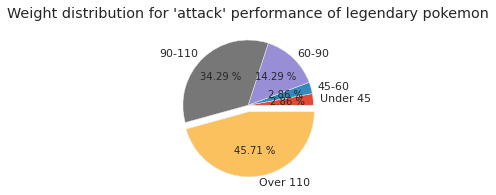

In [45]:
#1
plt.style.use('ggplot')
light_attack =pokemon_performance_isleg.loc[pokemon_performance_isleg.attack < 45].count()[0]
lightmedian_attack= pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 45)&(pokemon_performance_isleg.attack < 60)].count()[0]
median_attack= pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 60)&(pokemon_performance_isleg.attack < 90)].count()[0]
medianheavy_attack = pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 90)&(pokemon_performance_isleg.attack < 110)].count()[0]
heavy_attack =pokemon_performance_isleg.loc[pokemon_performance_isleg.attack >= 110].count()[0]

attack_perf=[light_attack,lightmedian_attack, median_attack, medianheavy_attack, heavy_attack]
fig, ax = plt.subplots(figsize = (6,3))
labels=['Under 45','45-60','60-90','90-110','Over 110']
explode=(0,0,0,0,0.1)
plt.title("Weight distribution for 'attack' performance of legendary pokemon")
plt.pie(attack_perf, labels=labels, autopct='%.2f %%', explode=explode)

([<matplotlib.patches.Wedge at 0x7f688858da30>,
 [Text(1.0057952886589099, 0.44539402478203555, '<45'),
  Text(0.15314236426764966, 1.0892875728045899, '45-60'),
  Text(-1.0970655092326054, -0.0802948843464163, '60-90'),
  Text(0.21372993760303968, -1.0790363820428859, '90-110'),
  Text(1.1794432640949635, -0.5467299029511906, '>110')],
 [Text(0.5486156119957689, 0.2429421953356557, '13.27 %'),
  Text(0.08353219869144525, 0.5941568578934125, '19.02 %'),
  Text(-0.5983993686723301, -0.04379720964349979, '37.76 %'),
  Text(0.11657996596529435, -0.5885652992961196, '16.14 %'),
  Text(0.7258112394430544, -0.33644917104688654, '13.82 %')])

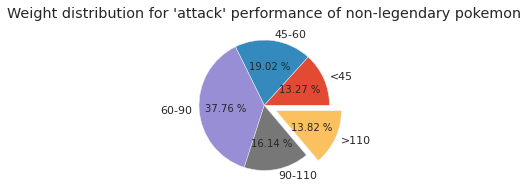

In [46]:
light_attack_2 =pokemon_performance_notleg.loc[pokemon_performance_notleg.attack < 45].count()[0]
lightmedian_attack_2= pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 45)&(pokemon_performance_notleg.attack < 60)].count()[0]
median_attack_2= pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 60)&(pokemon_performance_notleg.attack < 90)].count()[0]
medianheavy_attack_2 = pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 90)&(pokemon_performance_notleg.attack < 110)].count()[0]
heavy_attack_2 =pokemon_performance_notleg.loc[pokemon_performance_notleg.attack >= 110].count()[0]

attack_perf_2=[light_attack_2,lightmedian_attack_2, median_attack_2, medianheavy_attack_2,heavy_attack_2]
fig, ax = plt.subplots(figsize = (6,3))
labels=['<45','45-60','60-90','90-110','>110']
explode=(0,0,0,0,0.2)
plt.title("Weight distribution for 'attack' performance of non-legendary pokemon")
plt.pie(attack_perf_2, labels=labels, autopct='%.2f %%',explode=explode)

 3. Distribution of speed function.

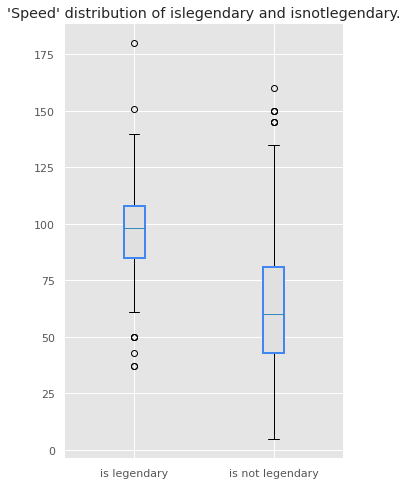

In [47]:
#2
plt.figure(figsize=(5,8))
speed_isleg=pokemon_performance_isleg['speed']
speed_notleg=pokemon_performance_notleg['speed']
labels=['is legendary','is not legendary']

boxes= plt.boxplot([speed_isleg,speed_notleg], labels=labels, patch_artist=True)
plt.title("'Speed' distribution of islegendary and isnotlegendary.")

for box in boxes['boxes']:
    box.set(color='#4286f4',linewidth=2)
    
    box.set(facecolor='#e0e0e0')
    
plt.show()


4. Three-dimensional view of blood volume and speed

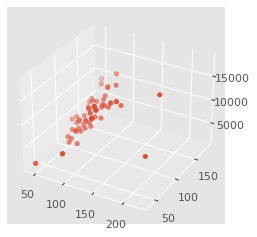

In [48]:
from mpl_toolkits import mplot3d

ax=plt.axes(projection="3d")

x_data_isleg=pokemon_performance_isleg['hp']
y_data_isleg=pokemon_performance_isleg['speed']
z_data_isleg=x_data_isleg*y_data_isleg
                                 
ax.scatter(x_data_isleg,y_data_isleg,z_data_isleg)
plt.show()

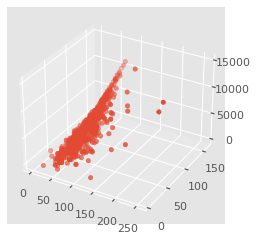

In [49]:
ax=plt.axes(projection="3d")

x_data_notleg=pokemon_performance_notleg['hp']
y_data_notleg=pokemon_performance_notleg['speed']
z_data_notleg=x_data_notleg*y_data_notleg
                                 
ax.scatter(x_data_notleg,y_data_notleg,z_data_notleg)
plt.show()

5. Using Linear Regrssion to test the legendary column

In [50]:
X=pokemon_performance.drop(columns=['is_legendary','name'],axis=1)
Y=pokemon_performance['is_legendary']

In [51]:
#splitting data into train and test data
X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(801, 9) (640, 9) (161, 9)


In [52]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [53]:
clf.fit(X_train,Y_train)
clf.predict(X_test)

array([ 0.09053747, -0.0147636 , -0.08076271, -0.12446971,  0.02412379,
       -0.08019369,  0.23535931,  0.21019809, -0.09538078,  0.08441104,
        0.01932321,  0.16871971,  0.13883097, -0.01486763, -0.04660877,
       -0.03849389, -0.00656982,  0.04501266,  0.03675356,  0.04856079,
        0.10386855,  0.15371069, -0.06869286,  0.00621197,  0.19835068,
        0.10292893,  0.10557388,  0.09886116,  0.13589691, -0.04966201,
        0.25203911, -0.17113828,  0.10648347, -0.09207697,  0.20019067,
       -0.02437488,  0.21255676,  0.03062059,  0.51624307, -0.06149548,
        0.36158238,  0.13875159,  0.02923581,  0.34455112,  0.02585413,
        0.0824687 ,  0.04589586,  0.1237343 ,  0.12543349, -0.12614893,
        0.07681242, -0.00126211,  0.0497867 , -0.10720821,  0.18993285,
       -0.02461891, -0.08897665,  0.22604954,  0.09956025,  0.17908151,
        0.08025444, -0.05656352,  0.00528336, -0.0148582 , -0.05663724,
       -0.10235532,  0.14449805,  0.11375238,  0.36807752,  0.14

In [54]:
clf.score(X_test,Y_test) #accuracy is quite low: 0.34

0.34104395367448637

6. Same, but using RandomForestClassifier to predict legendary column.

In [55]:
#Creation of data frame, and editing of dataframe to be usuable by our model.

df1=pd.DataFrame(Pokemon).fillna(0)

#Dropping all non-related Pokemon perfomance stats. 

X_L = df1.drop(columns=['pokedex_number','name','type1', 'type2','is_legendary','abilities','against_bug','against_dark','against_dragon',	'against_electric',	'against_fairy',	'against_fight',	'against_fire',	'against_flying',	'against_ghost','generation','japanese_name','against_grass',	'against_ground',	'against_ice',	'against_normal',	'against_poison',	'against_psychic',	'against_rock',	'against_steel'
, 'against_water','base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total','weight_kg','height_m'])
Y_L = df1["is_legendary"]

In [56]:
#Train test split 
X_train, X_test, y_train,y_test = train_test_split(X_L.values,Y_L.values)
print("Successful Split")

Successful Split


In [57]:
from sklearn.ensemble import RandomForestClassifier as RF
#Create Model 

clf = RF(bootstrap=True)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

#clf.predict(np.array([[120,600,75,3,88,100,75,142,50]]))[0] == 1

0.9701492537313433

7. Web scrapping and Machine Learning

To create this model we need complete several steps:

1. First create an edited data dataframe, so our model can easily read the necessary stats of each pokemon
2.  Second, we need to split our dataframe's values into trainable and testable sets of data for our model
3.  Last, create our model and evaluate if it can truly guess if a pokemon is legendary or not

In [90]:
# web scrap and create the 8th generation dataset + explain


## Only run this once because it creates a csv file that we manually had to edit 
from urllib.request import Request,urlopen 
from bs4 import BeautifulSoup as soup
import csv
import requests
import lxml

my_url= 'https://pokemondb.net/pokedex/stats/gen8'

req = Request(my_url,headers={'User-Agent': 'Mozilla/5.0'})
webpage_html = urlopen(req).read()
urlopen(req).close()
page_soup = soup(webpage_html,"html.parser")
#page_soup.table
table = page_soup.find("table",{"class":"data-table"})

rows = table.findAll('tr')
headers = rows[0]
header_text = []

# add the table header text to array
for th in headers.findAll('th'):
    header_text.append(th.text)

# init row text array
row_text_array = []

# loop through rows and add row text to array
for row in rows[1:]:
    row_text = []
    # loop through the elements
    for row_element in row.findAll(['th', 'td']):
        # append the array with the elements inner text
        row_text.append(row_element.text.replace('\n', '').strip())
    # append the text array to the row text array
    row_text_array.append(row_text)

with open("PokemonGen8.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerow(header_text)
    for row_text_single in row_text_array:
        wr.writerow(row_text_single) 

In [48]:
# cleaning data 

Pokemongen8 = pd.read_csv("./Pokemon_gen8.csv") 

df8 = pd.DataFrame(Pokemongen8)

df8=df8.dropna(how="all")

We assumed that the 8th pokemon was a legendary if its 'total' over 580. Otherwise, it is non legendary. 
First print out all the eighth-generation legendary Pokémon we assumped.

In [52]:
# create the new column 'is_legend' for our condition
df8['islegend_we_assume']='0'
df8.loc[df8["Total"] >= 580, "islegend_we_assume"] = "1"
df8
#df8.loc[df8['is_legend'] == '1']

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,is_legendary,is_legend,islegend_we_create,islegend_we_assume
0,52,Meowth Galarian Meowth,Steel,290,50,65,55,40,40,40,0,0,0,0
1,77,Ponyta Galarian Ponyta,Psychic,410,50,85,55,65,65,90,0,0,0,0
2,78,Rapidash Galarian Rapidash,Psychic Fairy,500,65,100,70,80,80,105,0,0,0,0
3,79,Slowpoke Galarian Slowpoke,Psychic,315,90,65,65,40,40,15,0,0,0,0
4,80,Slowbro Galarian Slowbro,Poison Psychic,490,95,100,95,100,70,30,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,896,Glastrier,Ice,580,100,145,130,65,110,30,1,1,1,1
114,897,Spectrier,Ghost,580,100,65,60,145,80,130,1,1,1,1
115,898,Calyrex,Psychic Grass,500,100,80,80,80,80,80,1,0,0,0
116,898,Calyrex Ice Rider,Psychic Ice,680,100,165,150,85,130,50,1,1,1,1


However, based on the webpage https://pokemondb.net/pokedex/stats/gen8, 
we found that there are two Pokémon that are repel from our hypothesis.
number 887 Dragapult and number 893 Zarude are actually non legendary pokemon.

- Note: We create Pokemon_gen8.csv from the raw output of PokemonGen8.csv because we had to manually add in a legendary columns:'islegend_we_assume', and then identify which Pokemon is legendary from generation eight.

In [49]:
X_L8 = df8.drop(columns= ['is_legendary', 'Type', 'Name', '#'])
Y_L8 = df8['is_legendary']

## Split the values for generation 8
X_train1, X_test1, y_train1,y_test1 = train_test_split(X_L8.values,Y_L8.values)
print("Successful Split")



clf3 = RF(bootstrap=True)
clf3.fit(X_train1,y_train1)

print(clf3.score(X_test1,y_test1)) #new model(gen8) testing itself



print(clf.score(X_test1,y_test1)) ## The first first (gen1-7) is routinely bad at matching gen 8 legendaries

print(clf3.score(X_test,y_test)) #after we got the eighth generation, 

Successful Split
0.9333333333333333
0.8333333333333334
0.9104477611940298


Clf result is based on the last seven generations, to score the 8th generation. We got 83%.
After we applied 8th generation data, we tested clf3 score, which is fully based on eight generation. And we get 91%

- Section 4 conclusion: 
There are stark differences in identification of legendary pokemon in generation 8 by using the old Machine learning model (trained on generation 1-7). This shows that non-legendary pokemon are very different compared to the previous generation. We also showed visually how non legendary pokemon differs from a legendary pokemon based on pure stats.



------

### Summary

- Section 1: Our hypothesis: Each generation of pokemon there is a stat inflation in pokemon. Our hypothesis is false.  No great changes, looking at the graphs. There are some differences in types of Pokemon. 

- Section 2:  Our hypothesis: Two type Pokemon are stronger (base stat) than Single type Pokemon. There is a slight edge to Two type pokemon if you only look at the graphs. But there is no statistical significance. Therefore our hypothesis is false. 

- Section 3:  Lasso Regression and Random Forest regression has a high accuracy rating in forecasting Pokemon stats in comparison to Simple regressions. 

- Section 4: Although each Machine learning model had accuracy rating in identifying a legendary pokemon. The older model did poorly finding legendary pokemon in generation 8 data. The new machine learning model trained on generation 8 data values did better in identifying its own data set and the older generation data set.  


--------

### Reference List

- Data sources

https://www.kaggle.com/rounakbanik/pokemon

https://pokemondb.net/pokedex/stats/gen8

- Coding reference 

Chase Coleman, Spencer Lyon, and Jesse Perla, QuantEcon DataScience textbook.

McKay Johns (2021, March 5th). How to Create Radar Charts for Soccer Analysis in Python. Retrieved December 20, 2021, from https://www.youtube.com/watch?v=cXtC2EOQj6Q&list=LL&index=3

<br/>
<center> Dec, 20, 2021
<center> by Chia Lin Chiu, Arham Newaz  